In [1]:
import pandas as pd
df_sh=pd.read_csv(r'sanhu.csv',encoding='gbk')
df_sh

,time,text
0,2024年6月04日05:18,嘿嘿，五方光电带来贺电成功套住一批散户
1,2024年6月03日08:56,美联储撑美元呗，各国央行建仓。
2,2024年6月01日07:06,空头不给力呀
3,2024年5月31日01:30,急跌慢涨．牛市特征
4,2024年5月31日24:32,我真的要感謝我的兄弟向我介紹了（+573507295749）並在我離開時回覆了我。 我很感激...
...,...,...
1984,2022年11月17日02:41,1770可以上车了，敢敢干！
1985,2022年11月17日24:16,1700赶紧的下去吧
1986,2022年11月16日12:37,1820
1987,2022年11月16日11:24,1793


In [2]:
df_sh['time'] = df_sh['time'].astype(str)

# 删除包含"小时前"的行
df_sh = df_sh[~df_sh['time'].str.contains('小时以前', na=True)]

# 定义一个函数来提取年月日部分
def extract_date_only(date_str):
    # 使用split在“日”后面分割，取第一部分（年月日），然后拼接上“日”
    return date_str.split('日')[0] + '日'

# 应用函数提取年月日
df_sh['time'] = df_sh['time'].apply(extract_date_only)

# 将提取的年月日字符串转换为datetime格式，然后再转为指定的字符串格式
df_sh['time'] = pd.to_datetime(df_sh['time'], format='%Y年%m月%d日').dt.strftime('%Y年%m月%d日')
df_sh

,time,text
0,2024年06月04日,嘿嘿，五方光电带来贺电成功套住一批散户
1,2024年06月03日,美联储撑美元呗，各国央行建仓。
2,2024年06月01日,空头不给力呀
3,2024年05月31日,急跌慢涨．牛市特征
4,2024年05月31日,我真的要感謝我的兄弟向我介紹了（+573507295749）並在我離開時回覆了我。 我很感激...
...,...,...
1984,2022年11月17日,1770可以上车了，敢敢干！
1985,2022年11月17日,1700赶紧的下去吧
1986,2022年11月16日,1820
1987,2022年11月16日,1793


count    1989.000000
mean       20.604324
std        27.506919
min         1.000000
25%         8.000000
50%        14.000000
75%        24.000000
max       389.000000
Name: text_length, dtype: float64


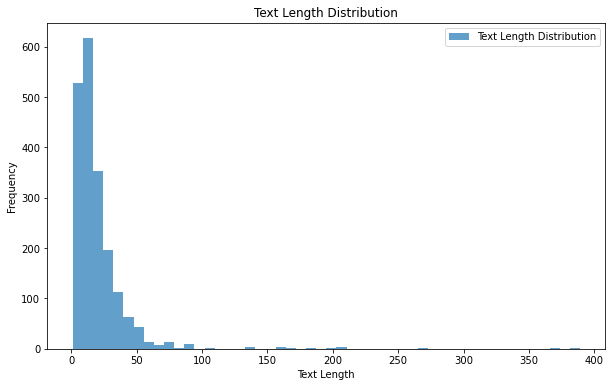

In [3]:
import matplotlib.pyplot as plt
df_sh['text_length'] = df_sh['text'].apply(len)
descriptive_stats = df_sh['text_length'].describe(include='all')
print(descriptive_stats)
plt.figure(figsize=(10, 6))
plt.hist(df_sh['text_length'], bins=50, alpha=0.7, label='Text Length Distribution')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [4]:
import jieba
def tokensize(text):
    seg_list=jieba.cut(text)
    return ' '.join(seg_list)
df_sh['text'] = df_sh['text'].apply(tokensize)
df_sh

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\honor\AppData\Local\Temp\jieba.cache
Loading model cost 0.904 seconds.
Prefix dict has been built successfully.


,time,text,text_length
0,2024年06月04日,嘿嘿 ， 五方 光电 带来 贺电 成功 套住 一批 散户,19
1,2024年06月03日,美联储 撑 美元 呗 ， 各国 央行 建仓 。,15
2,2024年06月01日,空头 不给力 呀,6
3,2024年05月31日,急跌 慢涨 ． 牛市 特征,9
4,2024年05月31日,我 真的 要 感謝 我 的 兄弟 向 我 介紹 了 （ + 573507295749 ） 並...,76
...,...,...,...
1984,2022年11月17日,1770 可以 上车 了 ， 敢 敢干 ！,14
1985,2022年11月17日,1700 赶紧 的 下去 吧,10
1986,2022年11月16日,1820,4
1987,2022年11月16日,1793,4


In [5]:
with open('stopwords.txt', 'r', encoding='utf-8') as stop_file:
    stopwords = stop_file.read().splitlines()
df_sh['text']=df_sh['text'].apply(lambda x:' '.join([word for word in x.split() if word not in stopwords]))
df_sh

,time,text,text_length
0,2024年06月04日,嘿嘿 五方 光电 带来 贺电 成功 套住 一批 散户,19
1,2024年06月03日,美联储 撑 美元 各国 央行 建仓,15
2,2024年06月01日,空头 不给力,6
3,2024年05月31日,急跌 慢涨 ． 牛市 特征,9
4,2024年05月31日,真的 感謝 兄弟 介紹 573507295749 並在 離 開時 回覆 感激 因為 每週 只...,76
...,...,...,...
1984,2022年11月17日,1770 上车 敢干,14
1985,2022年11月17日,1700 赶紧 下去,10
1986,2022年11月16日,1820,4
1987,2022年11月16日,1793,4


In [9]:
from snownlp import SnowNLP
def sentiment_analysis(texts):
    sentiments = []
    for text in texts:
        if not text or text.strip() == '':
            sentiments.append('Empty')  # 或者你可以选择其他方式处理空文本
            continue
        # 使用SnowNLP进行情感分析
        sentiment = SnowNLP(text)
        if sentiment.sentiments > 0.65:  
            sentiments.append('Positive')
        elif sentiment.sentiments < 0.45:  
            sentiments.append('Negative')
        else:
            sentiments.append('Neutral')
    return sentiments
df_sh['sentiment'] = sentiment_analysis(df_sh['text'])
df_sh

,time,text,text_length,sentiment
0,2024年06月04日,嘿嘿 五方 光电 带来 贺电 成功 套住 一批 散户,19,Positive
1,2024年06月03日,美联储 撑 美元 各国 央行 建仓,15,Positive
2,2024年06月01日,空头 不给力,6,Negative
3,2024年05月31日,急跌 慢涨 ． 牛市 特征,9,Positive
4,2024年05月31日,真的 感謝 兄弟 介紹 573507295749 並在 離 開時 回覆 感激 因為 每週 只...,76,Negative
...,...,...,...,...
1984,2022年11月17日,1770 上车 敢干,14,Negative
1985,2022年11月17日,1700 赶紧 下去,10,Negative
1986,2022年11月16日,1820,4,Neutral
1987,2022年11月16日,1793,4,Neutral


Text(0, 0.5, 'Frequency')

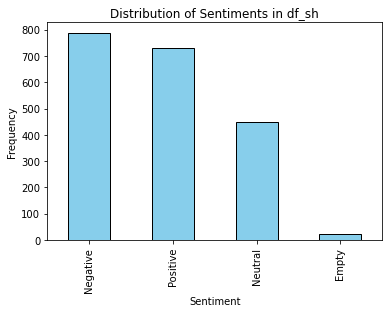

In [10]:
emotion_counts = df_sh['sentiment'].value_counts()
emotion_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Sentiments in df_sh')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

In [16]:
df_news=pd.read_csv(r'cleaned_data2.csv',encoding='utf-8')
df_news

,title,time,title_length,title_tokens,title_tokens_clean
0,美国非农强劲中国央行停买黄金遭双重打击,2024年06月08日 11:39,24,美国 非农 强劲 中国 央行 停买 黄金 遭 双重 打击,美国 非农 强劲 中国 央行 停买 黄金 遭 双重 打击
1,一觉醒来 国际贵金属期货集体暴跌又一次见证历史,2024年06月08日 08:14,24,一 觉醒 来 国际 贵金属 期货 集体 暴跌 又 一次 见证 历史,觉醒 国际 贵金属 期货 集体 暴跌 一次 见证 历史
2,5月外汇储备规模上升 央行暂停增持黄金,2024年06月08日 05:47,19,5 月 外汇储备 规模 上升 央行 暂停 增持 黄金,月 外汇储备 规模 上升 央行 暂停 增持 黄金
3,超过欧元挑战美元黄金占全球储备资产高达18,2024年06月07日 20:56,24,超过 欧元 挑战 美元 黄金 占 全球 储备 资产 高达 18,超过 欧元 挑战 美元 黄金 占 全球 储备 资产 高达 18
4,5月非农远超预期黄金跳水16美元美指冲高60点,2024年06月07日 20:39,24,5 月 非农 远超 预期 黄金 跳水 16 美元 美指 冲高 60 点,月 非农 远超 预期 黄金 跳水 16 美元 美指 冲高 60 点
...,...,...,...,...,...
1246,现货黄金跌破1910美元盎司 日内跌幅065,2023年09月12日 20:26,25,现货 黄金 跌破 1910 美元 盎司 日内 跌幅 065,现货 黄金 跌破 1910 美元 盎司 日内 跌幅 065
1247,多个珠宝品牌近期零售黄金价格突破600元克,2023年09月12日 20:10,22,多个 珠宝 品牌 近期 零售 黄金价格 突破 600 元克,多个 珠宝 品牌 近期 零售 黄金价格 突破 600 元克
1248,每日龙虎榜 期市资金日内净流入 PTA增仓位居榜首,2023年09月12日 16:48,27,每日 龙虎榜 期 市 资金 日内 净流入 PTA 增仓 位居 榜首,每日 龙虎榜 期 市 资金 日内 净流入 PTA 增仓 位居 榜首
1249,黄金时间每日论金美国经济衰退疑虑升温 黄金蓄势待发,2023年09月12日 14:26,27,黄金时间 每日 论金 美国 经济衰退 疑虑 升温 黄金 蓄势待发,黄金时间 每日 论金 美国 经济衰退 疑虑 升温 黄金 蓄势待发


In [18]:
df_news['sentiment1']=sentiment_analysis(df_news['title'])
df_news

,title,time,title_length,title_tokens,title_tokens_clean,sentiment1
0,美国非农强劲中国央行停买黄金遭双重打击,2024年06月08日 11:39,24,美国 非农 强劲 中国 央行 停买 黄金 遭 双重 打击,美国 非农 强劲 中国 央行 停买 黄金 遭 双重 打击,Positive
1,一觉醒来 国际贵金属期货集体暴跌又一次见证历史,2024年06月08日 08:14,24,一 觉醒 来 国际 贵金属 期货 集体 暴跌 又 一次 见证 历史,觉醒 国际 贵金属 期货 集体 暴跌 一次 见证 历史,Positive
2,5月外汇储备规模上升 央行暂停增持黄金,2024年06月08日 05:47,19,5 月 外汇储备 规模 上升 央行 暂停 增持 黄金,月 外汇储备 规模 上升 央行 暂停 增持 黄金,Positive
3,超过欧元挑战美元黄金占全球储备资产高达18,2024年06月07日 20:56,24,超过 欧元 挑战 美元 黄金 占 全球 储备 资产 高达 18,超过 欧元 挑战 美元 黄金 占 全球 储备 资产 高达 18,Positive
4,5月非农远超预期黄金跳水16美元美指冲高60点,2024年06月07日 20:39,24,5 月 非农 远超 预期 黄金 跳水 16 美元 美指 冲高 60 点,月 非农 远超 预期 黄金 跳水 16 美元 美指 冲高 60 点,Negative
...,...,...,...,...,...,...
1246,现货黄金跌破1910美元盎司 日内跌幅065,2023年09月12日 20:26,25,现货 黄金 跌破 1910 美元 盎司 日内 跌幅 065,现货 黄金 跌破 1910 美元 盎司 日内 跌幅 065,Negative
1247,多个珠宝品牌近期零售黄金价格突破600元克,2023年09月12日 20:10,22,多个 珠宝 品牌 近期 零售 黄金价格 突破 600 元克,多个 珠宝 品牌 近期 零售 黄金价格 突破 600 元克,Positive
1248,每日龙虎榜 期市资金日内净流入 PTA增仓位居榜首,2023年09月12日 16:48,27,每日 龙虎榜 期 市 资金 日内 净流入 PTA 增仓 位居 榜首,每日 龙虎榜 期 市 资金 日内 净流入 PTA 增仓 位居 榜首,Positive
1249,黄金时间每日论金美国经济衰退疑虑升温 黄金蓄势待发,2023年09月12日 14:26,27,黄金时间 每日 论金 美国 经济衰退 疑虑 升温 黄金 蓄势待发,黄金时间 每日 论金 美国 经济衰退 疑虑 升温 黄金 蓄势待发,Positive


In [19]:
df_news['time'] = df_news['time'].apply(extract_date_only)

# 将提取的年月日字符串转换为datetime格式，然后再转为指定的字符串格式
df_news['time'] = pd.to_datetime(df_news['time'], format='%Y年%m月%d日').dt.strftime('%Y年%m月%d日')
df_news

,title,time,title_length,title_tokens,title_tokens_clean,sentiment1
0,美国非农强劲中国央行停买黄金遭双重打击,2024年06月08日,24,美国 非农 强劲 中国 央行 停买 黄金 遭 双重 打击,美国 非农 强劲 中国 央行 停买 黄金 遭 双重 打击,Positive
1,一觉醒来 国际贵金属期货集体暴跌又一次见证历史,2024年06月08日,24,一 觉醒 来 国际 贵金属 期货 集体 暴跌 又 一次 见证 历史,觉醒 国际 贵金属 期货 集体 暴跌 一次 见证 历史,Positive
2,5月外汇储备规模上升 央行暂停增持黄金,2024年06月08日,19,5 月 外汇储备 规模 上升 央行 暂停 增持 黄金,月 外汇储备 规模 上升 央行 暂停 增持 黄金,Positive
3,超过欧元挑战美元黄金占全球储备资产高达18,2024年06月07日,24,超过 欧元 挑战 美元 黄金 占 全球 储备 资产 高达 18,超过 欧元 挑战 美元 黄金 占 全球 储备 资产 高达 18,Positive
4,5月非农远超预期黄金跳水16美元美指冲高60点,2024年06月07日,24,5 月 非农 远超 预期 黄金 跳水 16 美元 美指 冲高 60 点,月 非农 远超 预期 黄金 跳水 16 美元 美指 冲高 60 点,Negative
...,...,...,...,...,...,...
1246,现货黄金跌破1910美元盎司 日内跌幅065,2023年09月12日,25,现货 黄金 跌破 1910 美元 盎司 日内 跌幅 065,现货 黄金 跌破 1910 美元 盎司 日内 跌幅 065,Negative
1247,多个珠宝品牌近期零售黄金价格突破600元克,2023年09月12日,22,多个 珠宝 品牌 近期 零售 黄金价格 突破 600 元克,多个 珠宝 品牌 近期 零售 黄金价格 突破 600 元克,Positive
1248,每日龙虎榜 期市资金日内净流入 PTA增仓位居榜首,2023年09月12日,27,每日 龙虎榜 期 市 资金 日内 净流入 PTA 增仓 位居 榜首,每日 龙虎榜 期 市 资金 日内 净流入 PTA 增仓 位居 榜首,Positive
1249,黄金时间每日论金美国经济衰退疑虑升温 黄金蓄势待发,2023年09月12日,27,黄金时间 每日 论金 美国 经济衰退 疑虑 升温 黄金 蓄势待发,黄金时间 每日 论金 美国 经济衰退 疑虑 升温 黄金 蓄势待发,Positive


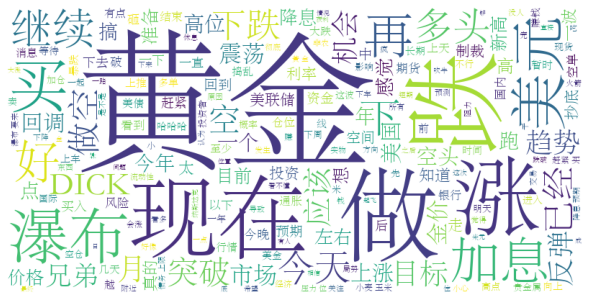

In [14]:
from wordcloud import WordCloud
text1 = ' '.join(df_sh['text'])
wordcloud = WordCloud(width = 800, height = 400, background_color ='white',font_path='C:\Windows\Fonts\STSONG.TTF').generate(text1)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.savefig('wordcloud1.png')
plt.show()

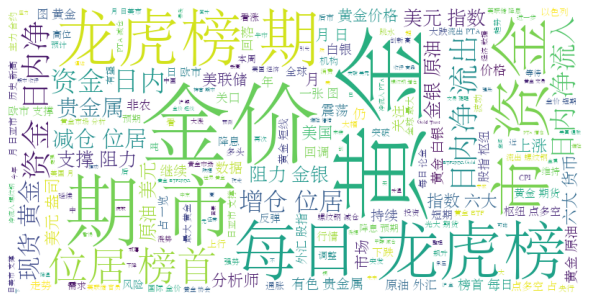

In [20]:
text2 = ' '.join(df_news['title_tokens_clean'])
wordcloud = WordCloud(width = 800, height = 400, background_color ='white',font_path='C:\Windows\Fonts\STSONG.TTF').generate(text2)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.savefig('wordcloud2.png')
plt.show()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
 
def createDTM(corpus):
    vectorize = TfidfVectorizer()
    #注意fit_transform相当于fit之后又transform。
    dtm = vectorize.fit_transform(corpus)
    #vectorize.fit(corpus)
    #dtm  = vectorize.transform(corpus) 
    #打印dtm
    return pd.DataFrame(dtm.toarray(), 
                        columns=vectorize.get_feature_names())

df1=createDTM(df_news['title_tokens_clean'])
df1

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,001,010,015,023,03,035,036,037,046,048,...,黄金时间,黄金珠宝,黄金饰品,黄金首饰,黑色,黑黑,齐创,齐涨,齐齐,龙虎榜
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.289326
1249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.346099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [22]:
df2=createDTM(df_sh['text'])
df2

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,01,08,10,100,1000,11,12,13,...,黄金,黄金价格,黄金周,黄金市场,黄金时代,黑暗,默默,黯然神伤,鼓励,齊貨
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
with open('positive.txt', 'r', encoding='utf-8') as f: positive_dict = f.read().splitlines()
with open('negative.txt', 'r', encoding='utf-8') as f: negative_dict = f.read().splitlines()
from sklearn.feature_extraction.text import TfidfVectorizer
# 初始化TF-IDF向量化器
vectorizer = TfidfVectorizer()
# 将文本数据向量化
tfidf_matrix = vectorizer.fit_transform(df_sh['text'])

# 定义计算情感得分的函数
def calculate_sentiment_score(text, positive_dict, negative_dict, vectorizer):
    # 将文本转换为TF-IDF向量
    tfidf_vector = vectorizer.transform([text])
    # 获取词语的TF-IDF值
    tfidf_values = tfidf_vector.toarray()[0]
    # 获取词语名称
    feature_names = vectorizer.get_feature_names_out()
    # 初始化积极和消极得分
    positive_score = 0
    negative_score = 0
    
    # 遍历TF-IDF值和对应的词语
    for i, value in enumerate(tfidf_values):
        feature_name = feature_names[i]
        # 如果词语在积极词典中，累加积极得分
        if feature_name in positive_dict:
            positive_score += value
        # 如果词语在消极词典中，累加消极得分
        elif feature_name in negative_dict:
            negative_score += value
    
    # 返回情感得分，可以是积极得分减消极得分
    return positive_score - negative_score

# 应用情感得分函数到每条文本上
df_sh['sentiment_score'] = df_sh['text'].apply(
    lambda x: calculate_sentiment_score(x, positive_dict, negative_dict, vectorizer)
)

# 显示结果
print(df_sh[['text', 'sentiment_score']])

                                                   text  sentiment_score
0                            嘿嘿 五方 光电 带来 贺电 成功 套住 一批 散户         0.663172
1                                     美联储 撑 美元 各国 央行 建仓         0.000000
2                                                空头 不给力         0.000000
3                                         急跌 慢涨 ． 牛市 特征        -0.476566
4     真的 感謝 兄弟 介紹 573507295749 並在 離 開時 回覆 感激 因為 每週 只...         0.225967
...                                                 ...              ...
1984                                         1770 上车 敢干         0.000000
1985                                         1700 赶紧 下去         0.000000
1986                                               1820         0.000000
1987                                               1793         0.000000
1988                                   1600 下来 成本价 1300         0.000000

[1989 rows x 2 columns]


In [25]:
df_sh

,time,text,text_length,sentiment,sentiment_score
0,2024年06月04日,嘿嘿 五方 光电 带来 贺电 成功 套住 一批 散户,19,Positive,0.663172
1,2024年06月03日,美联储 撑 美元 各国 央行 建仓,15,Positive,0.000000
2,2024年06月01日,空头 不给力,6,Negative,0.000000
3,2024年05月31日,急跌 慢涨 ． 牛市 特征,9,Positive,-0.476566
4,2024年05月31日,真的 感謝 兄弟 介紹 573507295749 並在 離 開時 回覆 感激 因為 每週 只...,76,Negative,0.225967
...,...,...,...,...,...
1984,2022年11月17日,1770 上车 敢干,14,Negative,0.000000
1985,2022年11月17日,1700 赶紧 下去,10,Negative,0.000000
1986,2022年11月16日,1820,4,Neutral,0.000000
1987,2022年11月16日,1793,4,Neutral,0.000000


In [26]:
df_sh[['text', 'sentiment_score']]

,text,sentiment_score
0,嘿嘿 五方 光电 带来 贺电 成功 套住 一批 散户,0.663172
1,美联储 撑 美元 各国 央行 建仓,0.000000
2,空头 不给力,0.000000
3,急跌 慢涨 ． 牛市 特征,-0.476566
4,真的 感謝 兄弟 介紹 573507295749 並在 離 開時 回覆 感激 因為 每週 只...,0.225967
...,...,...
1984,1770 上车 敢干,0.000000
1985,1700 赶紧 下去,0.000000
1986,1820,0.000000
1987,1793,0.000000


In [27]:
df_news['sentiment_score'] = df_news['title_tokens_clean'].apply(
    lambda x: calculate_sentiment_score(x, positive_dict, negative_dict, vectorizer)
)
df_news['sentiment_score']

0      -0.469946
1      -0.380429
2       0.466898
3      -0.370053
4       0.000000
          ...   
1246    0.000000
1247    0.310883
1248    0.000000
1249    0.000000
1250   -0.217260
Name: sentiment_score, Length: 1251, dtype: float64

In [28]:
df_news

,title,time,title_length,title_tokens,title_tokens_clean,sentiment1,sentiment_score
0,美国非农强劲中国央行停买黄金遭双重打击,2024年06月08日,24,美国 非农 强劲 中国 央行 停买 黄金 遭 双重 打击,美国 非农 强劲 中国 央行 停买 黄金 遭 双重 打击,Positive,-0.469946
1,一觉醒来 国际贵金属期货集体暴跌又一次见证历史,2024年06月08日,24,一 觉醒 来 国际 贵金属 期货 集体 暴跌 又 一次 见证 历史,觉醒 国际 贵金属 期货 集体 暴跌 一次 见证 历史,Positive,-0.380429
2,5月外汇储备规模上升 央行暂停增持黄金,2024年06月08日,19,5 月 外汇储备 规模 上升 央行 暂停 增持 黄金,月 外汇储备 规模 上升 央行 暂停 增持 黄金,Positive,0.466898
3,超过欧元挑战美元黄金占全球储备资产高达18,2024年06月07日,24,超过 欧元 挑战 美元 黄金 占 全球 储备 资产 高达 18,超过 欧元 挑战 美元 黄金 占 全球 储备 资产 高达 18,Positive,-0.370053
4,5月非农远超预期黄金跳水16美元美指冲高60点,2024年06月07日,24,5 月 非农 远超 预期 黄金 跳水 16 美元 美指 冲高 60 点,月 非农 远超 预期 黄金 跳水 16 美元 美指 冲高 60 点,Negative,0.000000
...,...,...,...,...,...,...,...
1246,现货黄金跌破1910美元盎司 日内跌幅065,2023年09月12日,25,现货 黄金 跌破 1910 美元 盎司 日内 跌幅 065,现货 黄金 跌破 1910 美元 盎司 日内 跌幅 065,Negative,0.000000
1247,多个珠宝品牌近期零售黄金价格突破600元克,2023年09月12日,22,多个 珠宝 品牌 近期 零售 黄金价格 突破 600 元克,多个 珠宝 品牌 近期 零售 黄金价格 突破 600 元克,Positive,0.310883
1248,每日龙虎榜 期市资金日内净流入 PTA增仓位居榜首,2023年09月12日,27,每日 龙虎榜 期 市 资金 日内 净流入 PTA 增仓 位居 榜首,每日 龙虎榜 期 市 资金 日内 净流入 PTA 增仓 位居 榜首,Positive,0.000000
1249,黄金时间每日论金美国经济衰退疑虑升温 黄金蓄势待发,2023年09月12日,27,黄金时间 每日 论金 美国 经济衰退 疑虑 升温 黄金 蓄势待发,黄金时间 每日 论金 美国 经济衰退 疑虑 升温 黄金 蓄势待发,Positive,0.000000


In [29]:
df_sh= df_sh.sort_values(by='time', ascending=False)
df_sh


,time,text,text_length,sentiment,sentiment_score
0,2024年06月04日,嘿嘿 五方 光电 带来 贺电 成功 套住 一批 散户,19,Positive,0.663172
1,2024年06月03日,美联储 撑 美元 各国 央行 建仓,15,Positive,0.000000
2,2024年06月01日,空头 不给力,6,Negative,0.000000
4,2024年05月31日,真的 感謝 兄弟 介紹 573507295749 並在 離 開時 回覆 感激 因為 每週 只...,76,Negative,0.225967
3,2024年05月31日,急跌 慢涨 ． 牛市 特征,9,Positive,-0.476566
...,...,...,...,...,...
1984,2022年11月17日,1770 上车 敢干,14,Negative,0.000000
1985,2022年11月17日,1700 赶紧 下去,10,Negative,0.000000
1986,2022年11月16日,1820,4,Neutral,0.000000
1987,2022年11月16日,1793,4,Neutral,0.000000


In [30]:
df_news= df_news.sort_values(by='time', ascending=False)
df_news

,title,time,title_length,title_tokens,title_tokens_clean,sentiment1,sentiment_score
0,美国非农强劲中国央行停买黄金遭双重打击,2024年06月08日,24,美国 非农 强劲 中国 央行 停买 黄金 遭 双重 打击,美国 非农 强劲 中国 央行 停买 黄金 遭 双重 打击,Positive,-0.469946
2,5月外汇储备规模上升 央行暂停增持黄金,2024年06月08日,19,5 月 外汇储备 规模 上升 央行 暂停 增持 黄金,月 外汇储备 规模 上升 央行 暂停 增持 黄金,Positive,0.466898
1,一觉醒来 国际贵金属期货集体暴跌又一次见证历史,2024年06月08日,24,一 觉醒 来 国际 贵金属 期货 集体 暴跌 又 一次 见证 历史,觉醒 国际 贵金属 期货 集体 暴跌 一次 见证 历史,Positive,-0.380429
16,金价一度顶破2380关口分析师有望继续向2400挺进,2024年06月07日,28,金价 一度 顶破 2380 关口 分析师 有望 继续 向 2400 挺进,金价 一度 顶破 2380 关口 分析师 有望 继续 2400 挺进,Positive,0.470478
29,开源宏观黄金定价底层逻辑新探索,2024年06月07日,17,开源 宏观 黄金 定价 底层 逻辑 新 探索,开源 宏观 黄金 定价 底层 逻辑 新 探索,Positive,0.000000
...,...,...,...,...,...,...,...
1246,现货黄金跌破1910美元盎司 日内跌幅065,2023年09月12日,25,现货 黄金 跌破 1910 美元 盎司 日内 跌幅 065,现货 黄金 跌破 1910 美元 盎司 日内 跌幅 065,Negative,0.000000
1247,多个珠宝品牌近期零售黄金价格突破600元克,2023年09月12日,22,多个 珠宝 品牌 近期 零售 黄金价格 突破 600 元克,多个 珠宝 品牌 近期 零售 黄金价格 突破 600 元克,Positive,0.310883
1248,每日龙虎榜 期市资金日内净流入 PTA增仓位居榜首,2023年09月12日,27,每日 龙虎榜 期 市 资金 日内 净流入 PTA 增仓 位居 榜首,每日 龙虎榜 期 市 资金 日内 净流入 PTA 增仓 位居 榜首,Positive,0.000000
1249,黄金时间每日论金美国经济衰退疑虑升温 黄金蓄势待发,2023年09月12日,27,黄金时间 每日 论金 美国 经济衰退 疑虑 升温 黄金 蓄势待发,黄金时间 每日 论金 美国 经济衰退 疑虑 升温 黄金 蓄势待发,Positive,0.000000


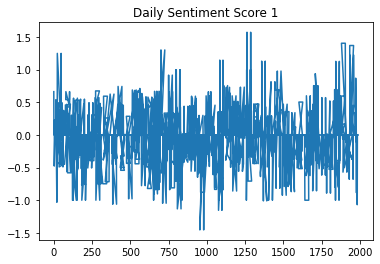

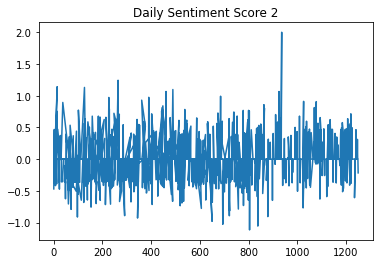

In [31]:
df_sh['sentiment_score'].plot()
plt.title('Daily Sentiment Score 1')
plt.show()
df_news['sentiment_score'].plot()
plt.title('Daily Sentiment Score 2')
plt.show()

In [32]:
df_sh['time'] = pd.to_datetime(df_sh['time'], format='%Y年%m月%d日') 
df_sh1 = df_sh.groupby(df_sh['time'].dt.date)['sentiment_score'].mean().reset_index()

# 重命名列，以便新DataFrame的列名为'date'和'avg_senti'
df_sh1.columns = ['date', 'avg_senti']

# 显示结果DataFrame
df_sh1

,date,avg_senti
0,2022-11-16,0.000000
1,2022-11-17,-0.152709
2,2022-11-18,-0.154672
3,2022-11-19,0.869701
4,2022-11-22,0.000000
...,...,...
326,2024-05-27,-0.053758
327,2024-05-31,-0.125299
328,2024-06-01,0.000000
329,2024-06-03,0.000000


In [33]:
df_news['time'] = pd.to_datetime(df_news['time'], format='%Y年%m月%d日') 
df_news1 = df_news.groupby(df_news['time'].dt.date)['sentiment_score'].mean().reset_index()

# 重命名列，以便新DataFrame的列名为'date'和'avg_senti'
df_news1.columns = ['date', 'avg_senti']

# 显示结果DataFrame
df_news1

,date,avg_senti
0,2023-09-11,-0.217260
1,2023-09-12,0.077721
2,2023-09-13,0.000000
3,2023-09-14,0.115970
4,2023-09-15,-0.202837
...,...,...
211,2024-06-04,-0.212764
212,2024-06-05,-0.134708
213,2024-06-06,-0.028788
214,2024-06-07,0.055064


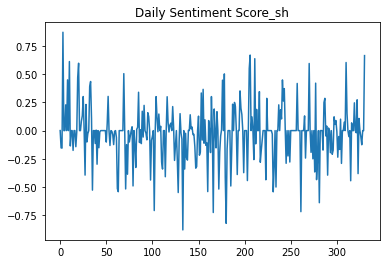

In [34]:
df_sh1['avg_senti'].plot()
plt.title('Daily Sentiment Score_sh')
plt.show()

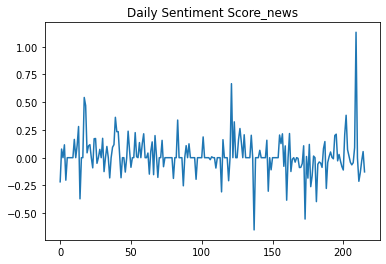

In [35]:
df_news1['avg_senti'].plot()
plt.title('Daily Sentiment Score_news')
plt.show()

In [36]:
df_sh1.set_index('date', inplace=True)
df_news1.set_index('date', inplace=True)

# 合并df_sh1和df_news1，how='outer'表示外连接，保留两个DataFrame的所有日期
df_merged = pd.merge(df_sh1, df_news1, left_index=True, right_index=True, how='outer')

# 填充缺失值，确保合并后每个日期都有数据，缺失的avg_senti用0填充
df_merged.fillna(0, inplace=True)

# 计算加权平均情感指标，df_sh1的权重0.4，df_news1的权重0.6
df_merged['all_senti'] = df_merged['avg_senti_x'] * 0.4 + df_merged['avg_senti_y'] * 0.6

# 选取需要的列并重命名，丢弃不必要的列
df_all = df_merged[['all_senti']].rename(columns={'all_senti': 'all_sentiment'})

# 重设索引，确保'date'列作为普通列存在
df_all.reset_index(inplace=True)

df_all

,date,all_sentiment
0,2022-11-16,0.000000
1,2022-11-17,-0.061084
2,2022-11-18,-0.061869
3,2022-11-19,0.347880
4,2022-11-22,0.000000
...,...,...
429,2024-06-04,0.137611
430,2024-06-05,-0.080825
431,2024-06-06,-0.017273
432,2024-06-07,0.033038


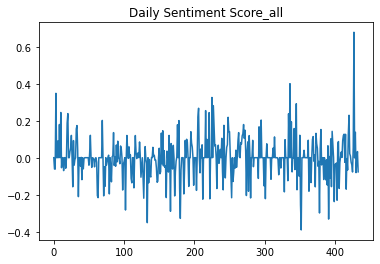

In [38]:
df_all['all_sentiment'].plot()
plt.title('Daily Sentiment Score_all')
plt.show()

In [33]:
df_all.to_csv('all_senti.csv')

In [34]:
df_sh1.to_csv('sh_senti.csv')
df_news1.to_csv('news_senti.csv')